# Chapter 13 Code

Script 13-1

In [1]:
#install igraph and pycairo
!pip install igraph
!pip install pycairo

In [2]:
#import igraph, pandas, and numpy
import igraph as ig
from igraph import Graph
import numpy as np
import pandas as pd
import os

In [3]:
#import adjacency matrix
File = "/Users/franckm/Documents/draftcodefiles/DRC_Transport.csv"
pwd = os.getcwd()
os.chdir(os.path.dirname(File))
mydata = pd.read_csv(os.path.basename(File),encoding='latin1',header=None)

/Users/franckm/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


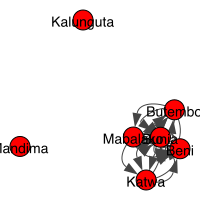

In [4]:
#create and plot graph
g_transport=Graph.Adjacency(mydata,directed=False,weighted=True)
ig.plot(g_transport,bbox=(200,200),vertex_label=["Beni","Bunia","Butembo","Kalunguta","Katwa",
                                                "Mabalako","Mandima"])

In [5]:
#calculate betweenness and degree centrality
bet=Graph.betweenness(g_transport)
deg=Graph.degree(g_transport)

In [6]:
#create vector to add to dataset
degree=deg+deg+deg+deg+deg
betweenness=bet+bet+bet+bet+bet

In [11]:
#import Ebola dataset
File = "/Users/franckm/Documents/draftcodefiles/Ebola_Data.csv"
pwd = os.getcwd()
os.chdir(os.path.dirname(File))
data = pd.read_csv(os.path.basename(File),encoding='latin1')

In [12]:
#add degree and betweenness to Ebola dataset
degree=np.array(degree)
betweenness=np.array(betweenness)
data['Betweenness']=betweenness
data['Degree']=degree

Script 13-2

In [13]:
#load packages
import statsmodels.api as sm
import statsmodels.formula.api as smf

AttributeError: module 'numpy' has no attribute 'MachAr'

In [ ]:
#define GEE parameters
family=sm.families.Poisson() #count data
cov_str=sm.cov_struct.Exchangeable() #data-derived covariance structure

In [ ]:
#create GEE model predicting Ebola cases
model=smf.gee("Ebola_Cases~Province+Violent_Incidents+Disasters+Degree+Betweenness","Town",data,cov_struct=cov_str,
              family=family)
results=model.fit()

In [10]:
#examine resulting model
results.summary()

NameError: name 'results' is not defined